In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from minisom import MiniSom

In [2]:
# Load the dataset assuming there is no header, and the separator is comma
file_path = 'https://raw.githubusercontent.com/raccamateo/NEC_A3/main/A3-data.txt'
NEC_data = pd.read_csv(file_path, header=None, sep=',')

In [15]:
# Check the first few rows to ensure they do not contain non-numeric values
print(NEC_data.head())

# Assuming the last column is the class label and all columns are numeric
X = NEC_data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')
y = NEC_data.iloc[:, -1].apply(pd.to_numeric, errors='coerce')

# Drop rows with any non-numeric values that could not be converted
X = X.dropna()
y = y.loc[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

                      0                    1                    2  \
0                     x                    y                    z   
1  -0.03167552503351045    -9.91205374378826  -0.5794361762587491   
2  0.002525986943430307    6.172455978669437   3.2883390705617175   
3   0.18312326558487735  -0.3878405546593373    6.236469772860241   
4  -0.04226222449397611  -1.9962722949660403  -1.6553020311874493   

                     3      4  
0                    t  class  
1   -1.044238808635487      1  
2  -1.0064274917407479      5  
3  -1.6914911528415706      2  
4   -2.995310745078718      1  


In [16]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert y to a numpy array
y_array = y.to_numpy().flatten()

In [17]:
# Create scatter plot of the first two principal components
# Generate a color map that includes all unique labels
unique_labels = np.unique(y_array)

# Create a color map using a colormap from matplotlib
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
color_map = {label: colors[i] for i, label in enumerate(unique_labels)}


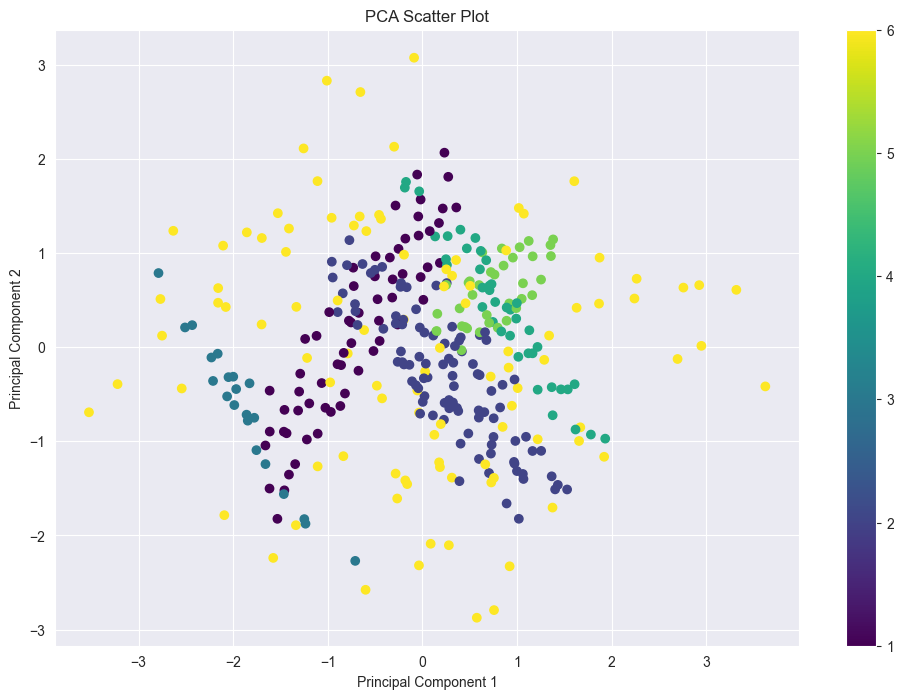

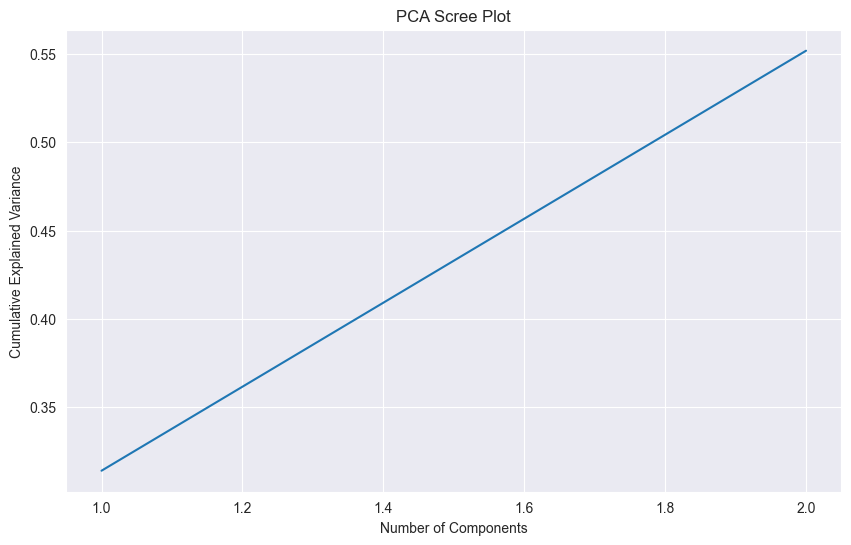

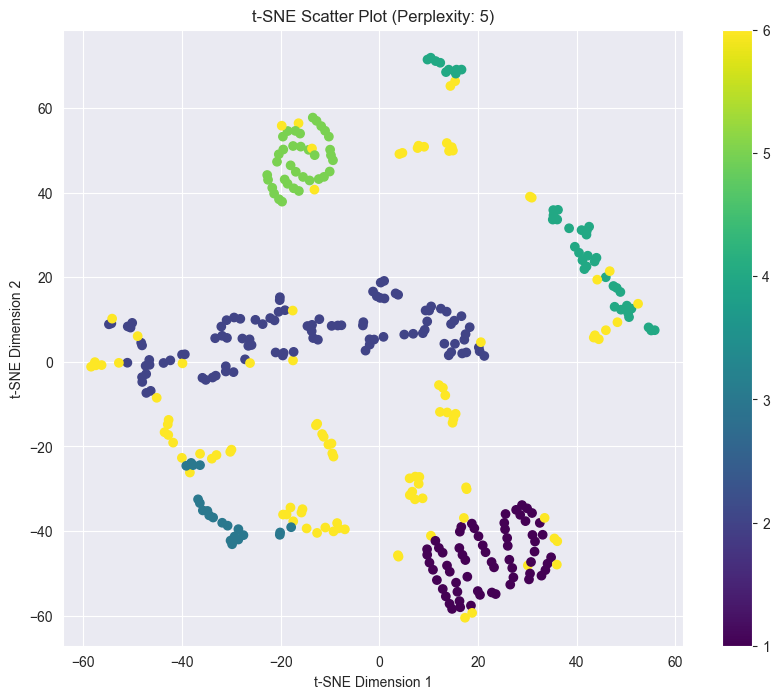

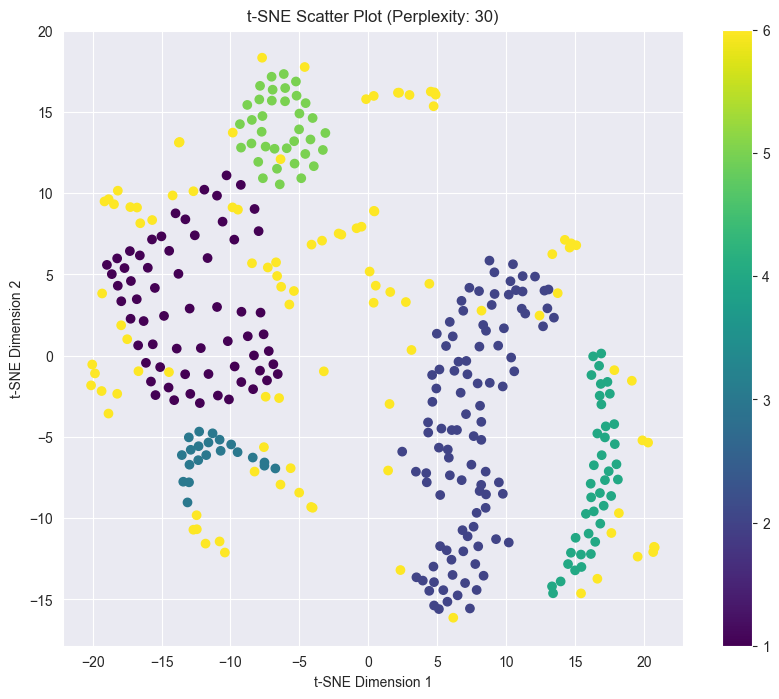

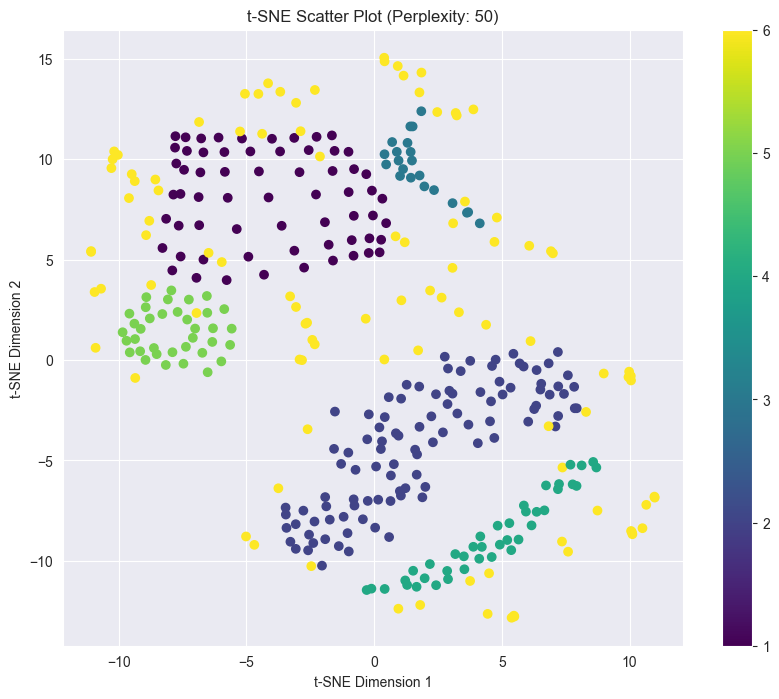

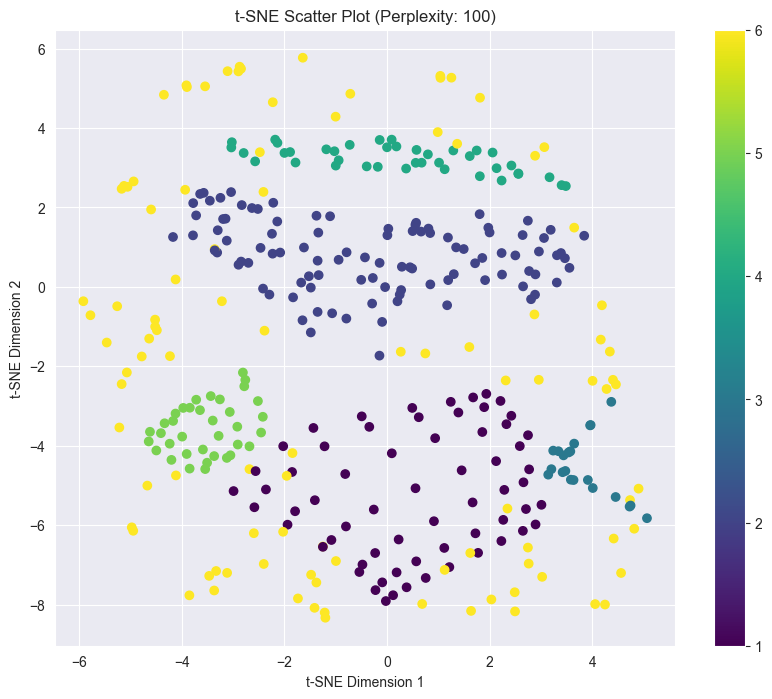

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


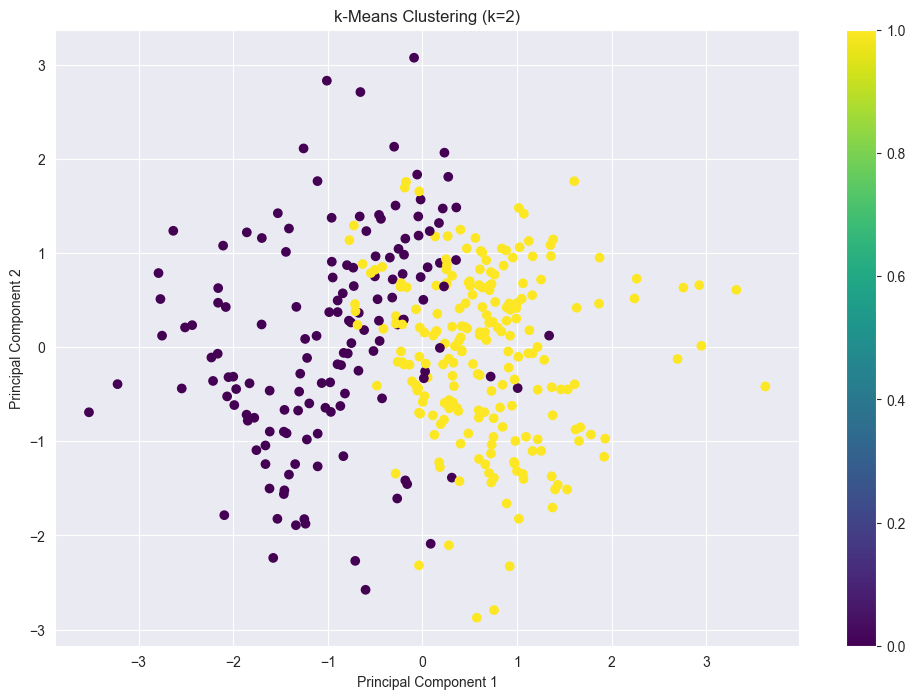

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


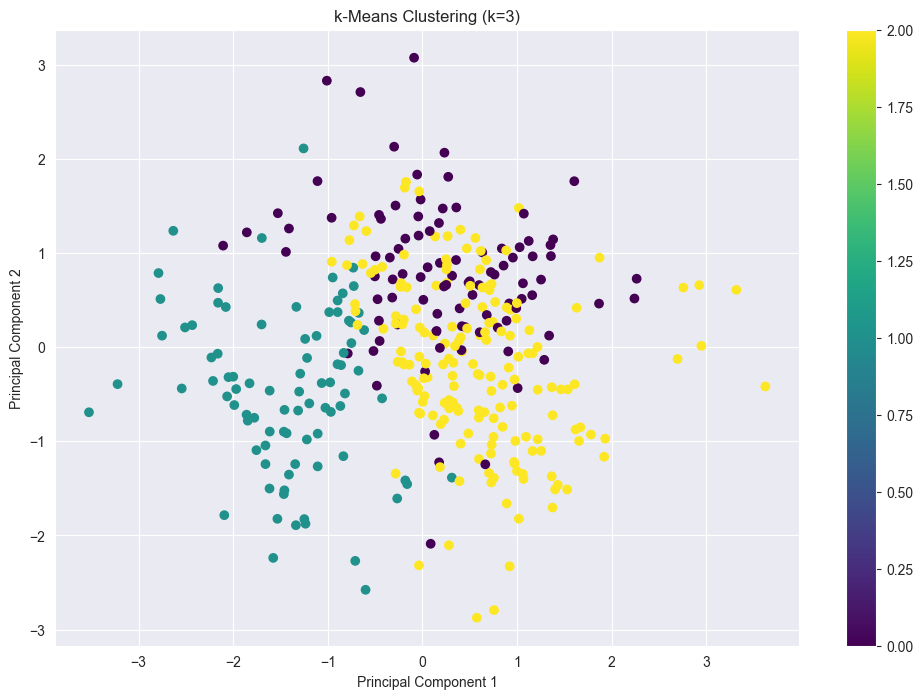

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


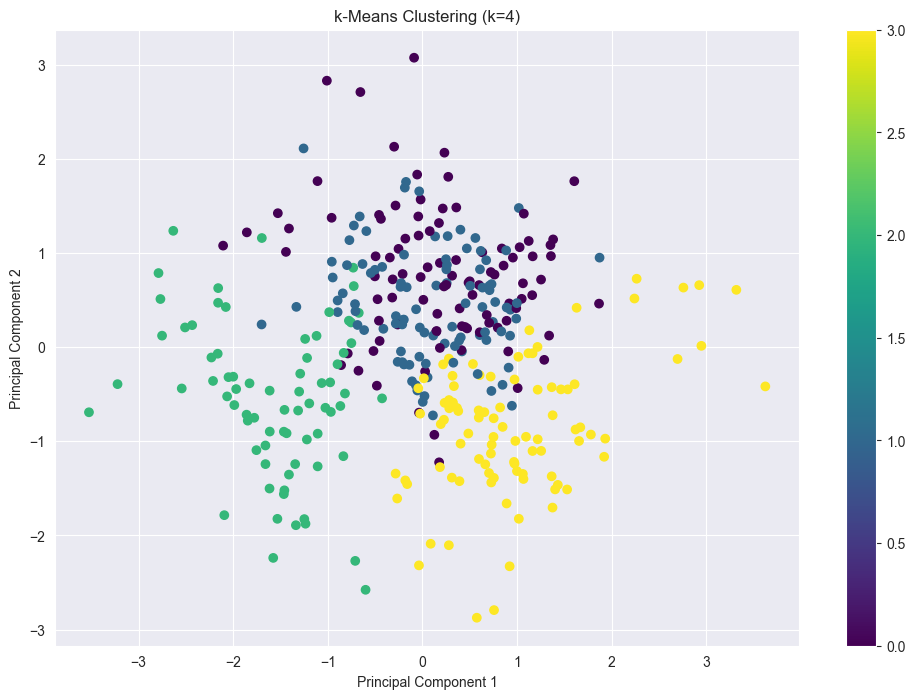

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


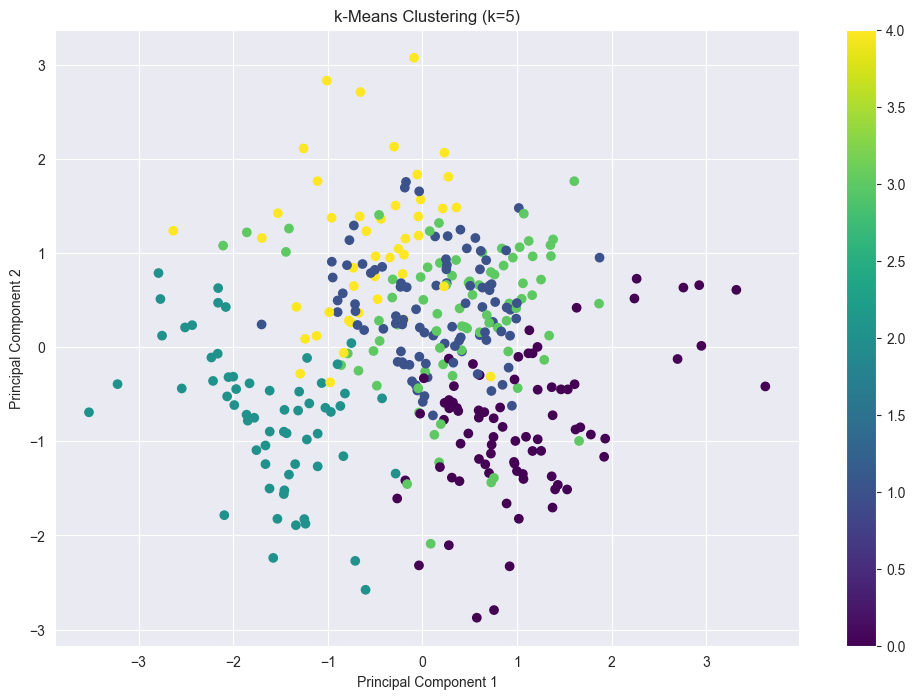

/Users/mwr/.conda/envs/A3_RACCA/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


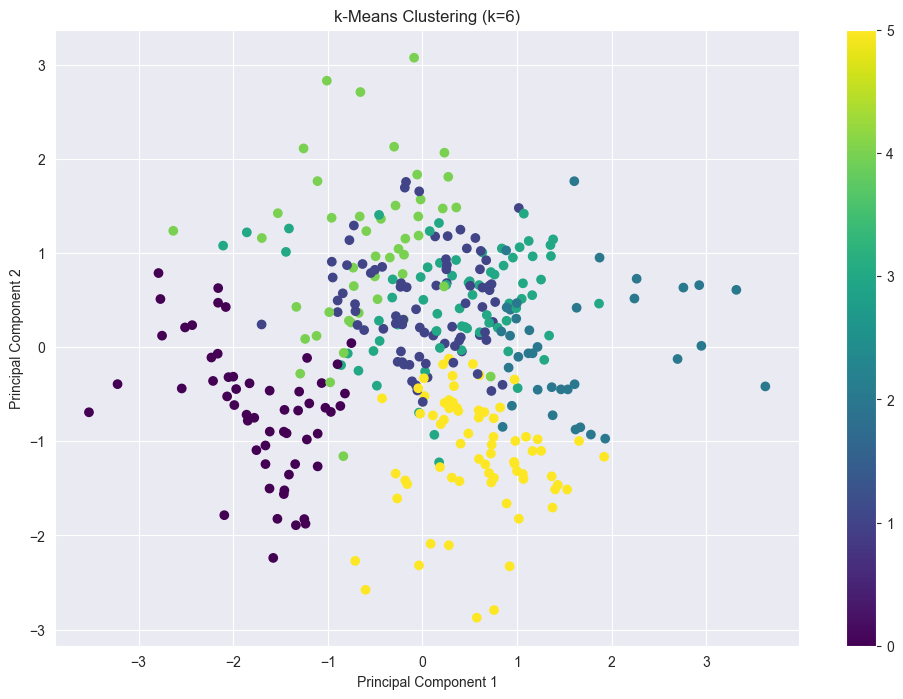

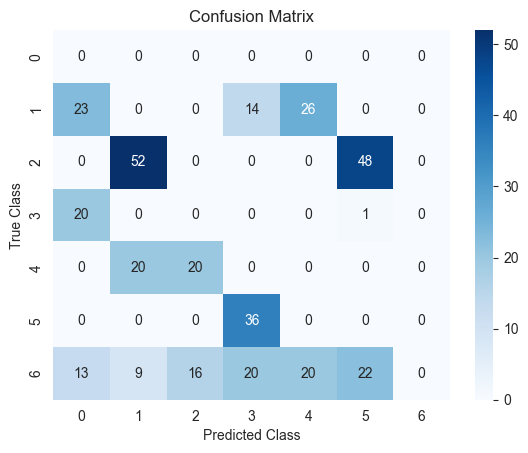

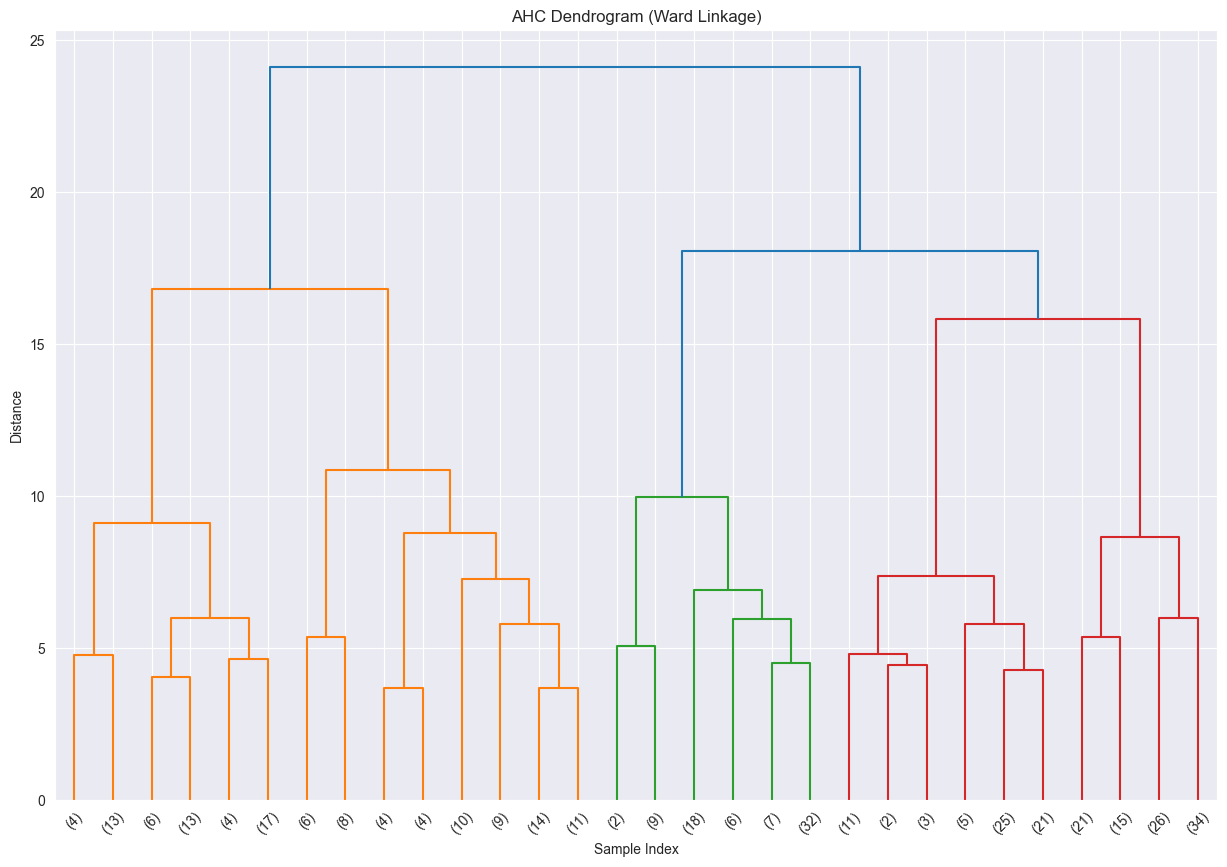

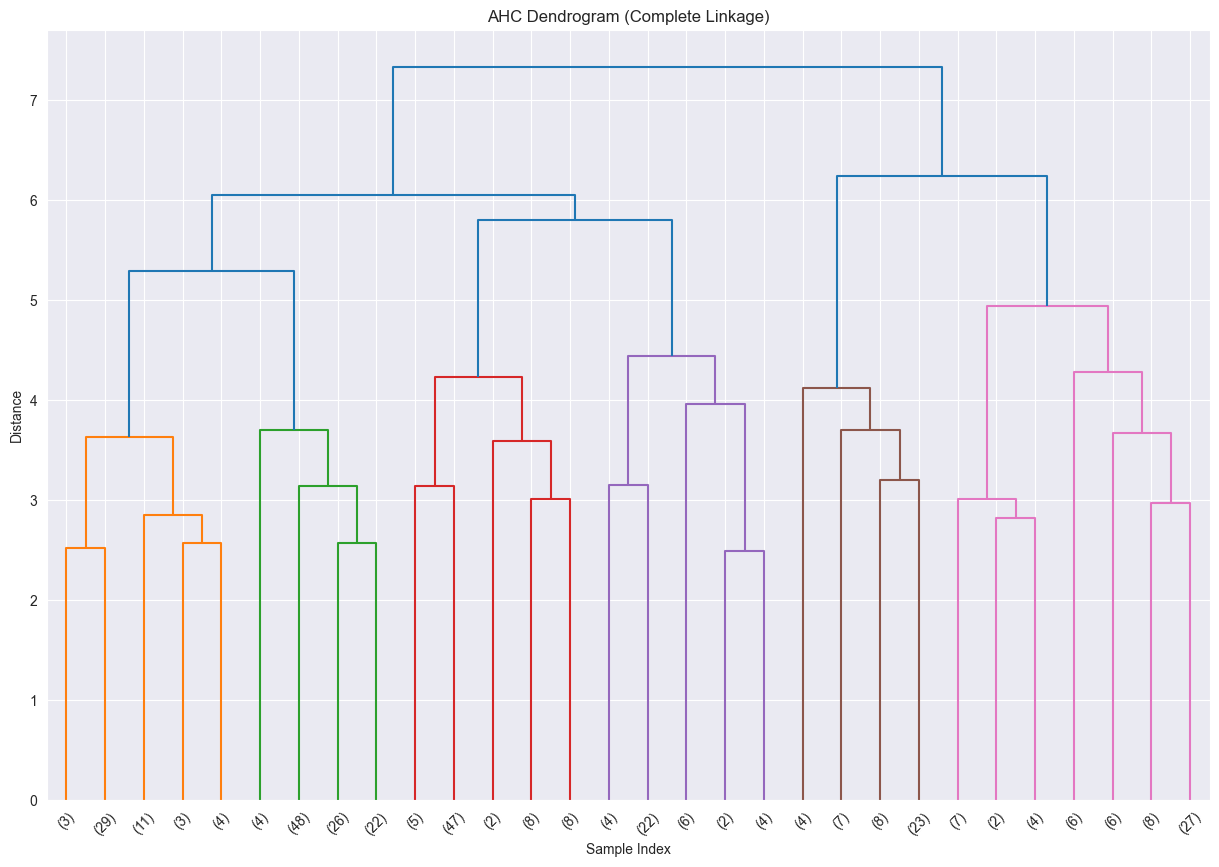

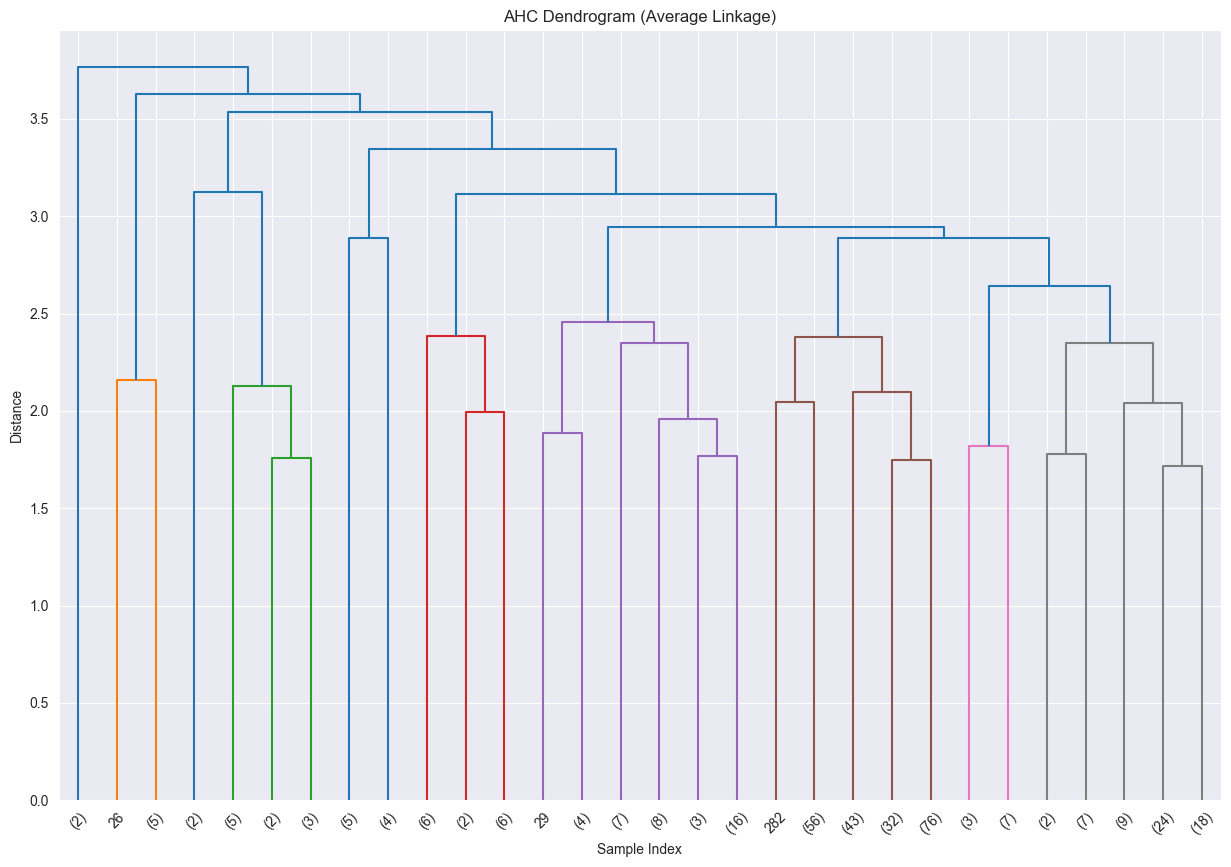

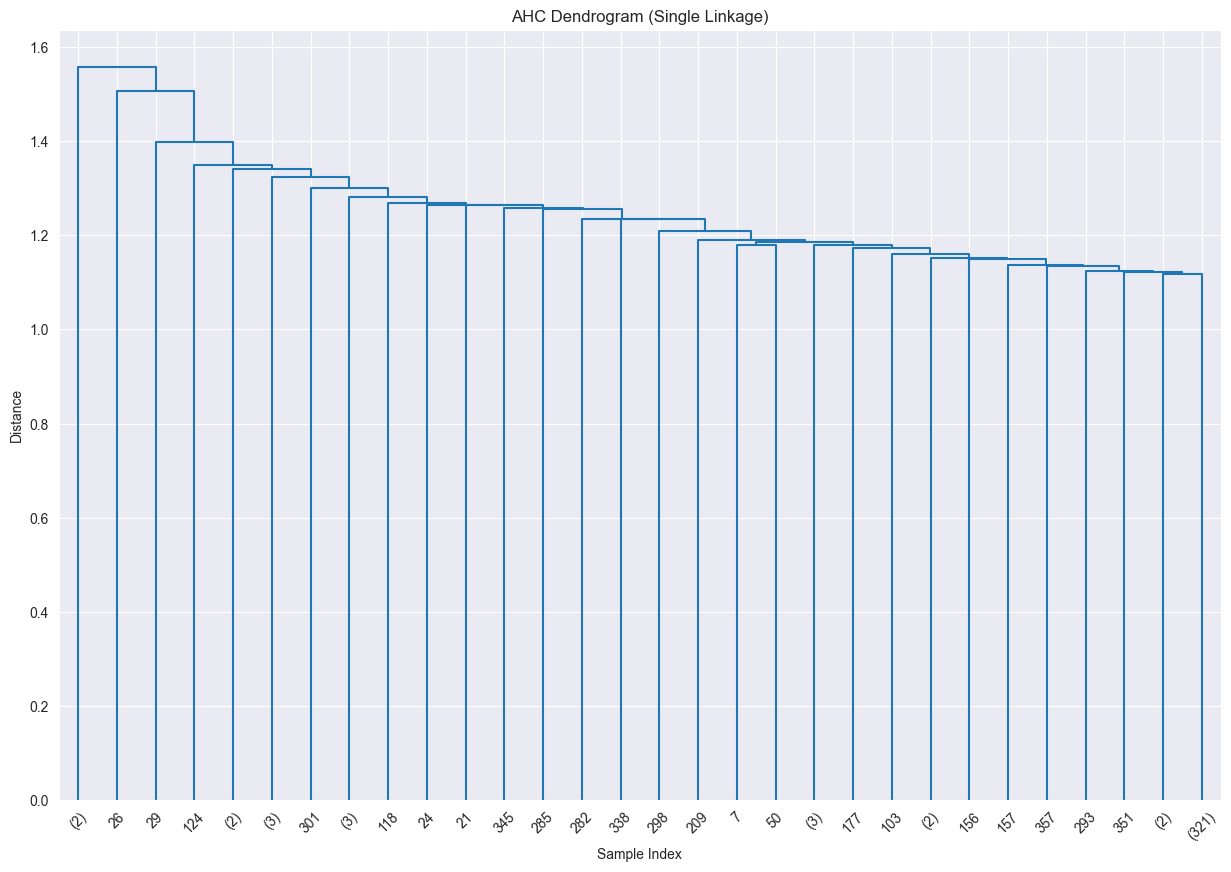

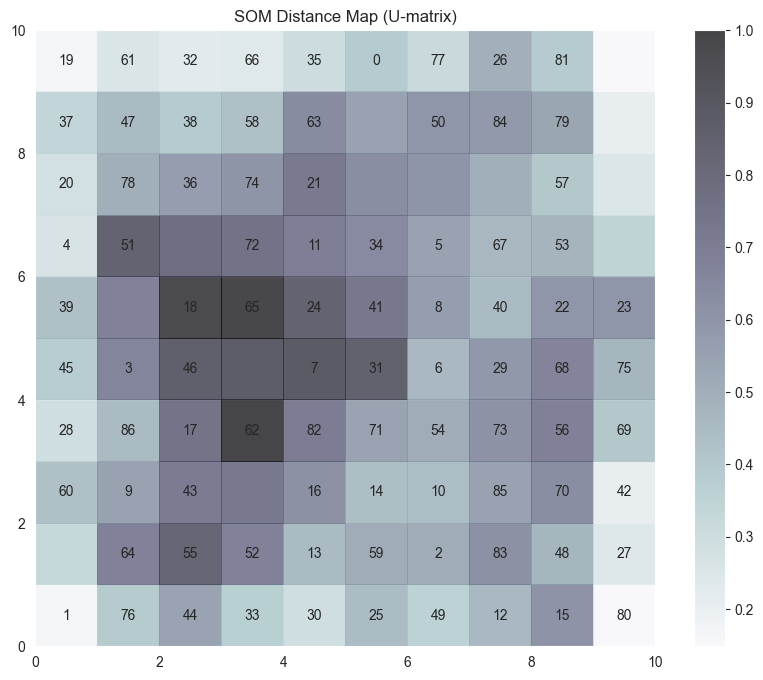

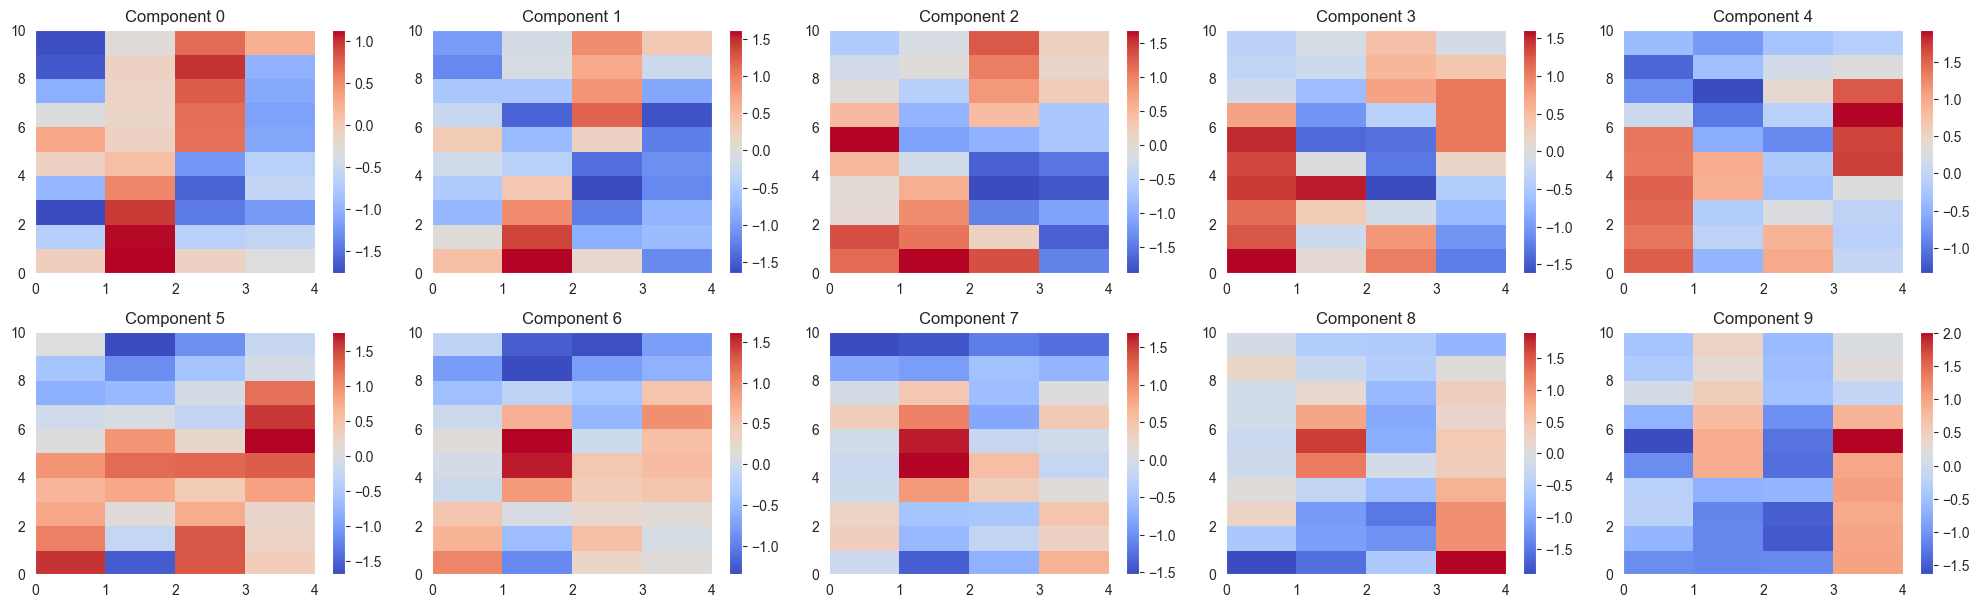

In [18]:
# PCA Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# PCA Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# t-SNE with Different Perplexities
perplexities = [5, 30, 50, 100]
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    plt.title(f't-SNE Scatter Plot (Perplexity: {perplexity})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar()
    plt.show()

# k-means Scatter Plot and Confusion Matrix (if applicable)
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'k-Means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

    if k == len(np.unique(y)):
        cm = confusion_matrix(y, cluster_labels)
        sns.heatmap(cm, annot=True, cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

# AHC Dendrogram for Each Method
for method in ['ward', 'complete', 'average', 'single']:
    linkage_matrix = linkage(X_scaled, method=method)
    
    plt.figure(figsize=(15, 10))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
    plt.title(f'AHC Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# SOM Visualization and Component Planes
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_scaled, 1000)

# SOM U-matrix
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.7)
plt.colorbar()
plt.title('SOM Distance Map (U-matrix)')
for i, (x, y) in enumerate(som.win_map(X_scaled).keys()):
    plt.text(x + 0.5, y + 0.5, str(i), ha='center', va='center')
plt.show()

# Component Planes
plt.figure(figsize=(20, 15))
for i, comp in enumerate(som.get_weights()):
    plt.subplot(5, 5, i + 1)
    plt.title(f'Component {i}')
    plt.pcolor(comp, cmap='coolwarm')
    plt.colorbar()
plt.tight_layout()
plt.show()
